
## Neural Networks

- Neural networks generalize logistic regression.
- Logistic regression and softmax regression are standard building blocks of NNs.
- Concepts like:
  - Linear regression
  - Logistic regression
  - Gradient descent  
  can help in understanding NNs

---

## What is a Neural Network ? 

- Just like regression and SVM, it is also a **function**:
  $$
  y = f_{NN}(x)
  $$
  (**a nested function**)

- Eg. 3-layer NN:
  $$
  y = f_3(f_2(f_1(x)))
  $$


---
## What is a layer?

- Each layer is also a function,
  $$
  f_l(z) = g_l(W_l z + b_l)
  $$
- Where:
  - $W_l$: weight matrix
  - $b_l$: bias vector
  - $g_l$: activation function (non-linear)

---

## Why Use a Matrix $W_l$?

- $g_l$ is a **vector function**
- $W_l$ must support multiple output units
- Each row $w_{l,u}$ in $W_l$ is a weight vector for one unit
- Each unit computes:
  $$
  a_{l,u} = w_{l,u}z + b_{l,u}
  $$
  $$
  \text{Output: } g_l(a_{l,u})
  $$

- A unit is called a neuron.

---

## Layer Output Vector

- For all units in a layer:
  $$
  [g_l(a_{l,1}), g_l(a_{l,2}), ..., g_l(a_{l,\text{size}_l})]
  $$
- This becomes the input to the next layer.

---

## Multilayer Perceptron (MLP)

- A type of Feed-Forward Neural Network (FFNN)
- Input: 2D feature vector
- Output: A number
- **Fully-connected**
- Also called: **Vanilla Neural Network**

---

## How Units Work

- Input → Vector
- Apply:
  1. **Linear transformation**: $w \cdot x + b$
  2. **Activation**: $g(w \cdot x + b)$
- Output sent to next layer’s all units (fully connected)

<img src="Images/MLP_6.png" width= 500 >

- Each unit = circle or rectangle

---

## FFNN Output Layer

- Last layer decides task:
  - **Regression** → Linear activation
  - **Binary Classification** → Logistic activation

---

## Why Activation Functions Matter

- Without them → entire NN becomes **linear**
- Linear function of a linear function = linear
- Nonlinear activations let NNs learn complex patterns


## Common Activation Functions

### Logistic (Sigmoid)
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

### TanH
$$
\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$$

### ReLU
$$
\text{ReLU}(z) =
\begin{cases}
0 & \text{if } z < 0 \\
z & \text{otherwise}
\end{cases}
$$

---

## Layer Computation Recap

- Compute:
  $$
  a_l = W_l z
  $$
- Add bias:
  $$
  c_l = a_l + b_l
  $$
- Apply activation:
  $$
  y_l = g_l(c_l)
  $$

---
## What is Deep Learning?

- Training neural networks with **more than two non-output layers**.
- Earlier, training deep networks was difficult due to:
  - **Exploding gradient problem**
  - **Vanishing gradient problem**

## Exploding vs Vanishing Gradient

- **Exploding Gradient:**
  - Easier to handle
  - Techniques: Gradient clipping, L1/L2 regularization

- **Vanishing Gradient:**
  - More challenging
  - Causes very small gradients → parameters stop updating → training halts

## Why Vanishing Gradient Happens

- Neural networks are trained using **backpropagation**:
  - Uses the **chain rule** to compute gradients layer by layer.
- Traditional activations (e.g., hyperbolic tangent) have gradients in (0,1).
- Multiplying many small gradients across layers → gradient shrinks **exponentially** with depth.
- Result: Early layers train very slowly or not at all.

---

## Modern Solutions to Vanishing Gradient

- Use of **ReLU** activation, which reduces vanishing gradient effect.
- Architectures like **LSTM** and **Residual Networks** (with skip connections).
- These allow training of very deep networks (hundreds or thousands of layers).

- "Deep learning" now means training neural networks using modern techniques regardless of depth.

- **Hidden layers** = layers that are neither input nor output.

---

# Convolutional Neural Network (CNN)

### Why CNNs?

- MLPs grow **very fast** in parameters with more layers.
- Adding a 1000-unit layer adds **over 1 million parameters**.
- Image inputs are **high-dimensional**, making MLPs **hard to optimize**.
- CNNs reduce parameters drastically **without losing much accuracy**.
- Especially useful in **image and text processing**.

## Intuition Behind CNNs

- Nearby pixels in images often represent the **same type of info** (eg, sky, water, etc).
- Exceptions are edges where different objects meet.
- CNNs learn to detect **regions and edges** to recognize objects.
- Example: detecting skin regions + edges (blue colour) → likely a face on sky background.

## How CNNs Work: Moving Window Approach

- Split image into **small square patches**.
- Train multiple small regression models on patches.
- Each model detects a **specific pattern** (sky, grass, edges).
- Each model learns parameters of a **filter matrix F** (e.g., 3×3).

## CNN Layer Structure

- One CNN layer = multiple filters + biases.
- Filters **slide (convolve)** across the image.
- Convolution + bias → passed through **non-linearity (ReLU)**.
- Output: one matrix per filter → stacked as a **volume**.

## Multiple CNN Layers

- Next layer convolves the **volume** output of previous layer.
- Convolution on volume = sum of convolutions on individual matrices.

- Input images are often 3-channel volumes: **R, G, B**.

<img src="Images/CNN_6.png" width= 500>

## Other CNN Features 
(Not Covered Here)
- **Strides** and **padding**: control filter sliding and image size.
- **Pooling**: reduces parameters by downsampling feature maps.

---

# Recurrent Neural Networks (RNNs)

## What is an RNN?
- A type of neural network used for **sequential data**.
- Handles **labeling**, **classification**, and **generation** of sequences.
- Commonly used in:
  - **Text processing**
  - **Speech recognition**
  - **Language modeling**

## Sequence Types
- **Labeling**: Predict a class for each time step.
- **Classification**: Predict a single class for the full sequence.
- **Generation**: Output a related sequence of possibly different length.

## How RNNs Work
- Not feed-forward: contains **loops**.
- Each unit has a **state** (memory) $h_{l,u}$.
- Each unit receives:
  - Output from previous layer $l - 1$
  - State from **same layer**, previous time step $t - 1$

<img src="Images/RNN_6.png" width= 500>

##  Example
Let input sequence be:
$$
X = [x^1, x^2, ..., x^t, ..., x^{length(x)}]
$$
- $x^t$ is a feature vector at time $t$
- Input is processed **one timestep at a time**
- If $X$ is a text sentence, then each feature vector $x^t$ represent a word in the sentence at position t.

## State Update Formula

For unit $u$ in layer $l$ :
$$
h_{l,u}^t = g_1(w_{l,u} · x_t + u_{l,u} · h_{l,u}^{t-1} + b_{l,u})
$$
- $g_1$ is usually $tanh$

Output:
$$
y_1^t = g_2(V_1 · h_1^t + c_{l,u})
$$
- $g_2$ is typically $softmax$

## Softmax Function
$$
\sigma(z) = [\sigma^{(1)}, ..., \sigma^{(D)}]
$$
$$
\sigma(j) = \frac {exp(z^{(j)})}{\sum_{k=1}^D exp(z^{(k)})} 
$$
- Generalization of sigmoid
- Produces probability distribution

## RNN Training
- Parameters: $w, u, b, V, C$
- Trained via **gradient descent**
- Use **Backpropagation Through Time (BPTT)**


## Problems with Vanilla RNNs
1. **Vanishing gradient** (especially with long sequences)
2. **Long-term dependencies** are hard to remember

## Solution - Gated RNNs 

- Two common types:
  - **LSTM (Long Short-Term Memory)**
  - **GRU (Gated Recurrent Unit)**
- Use **gates** to control memory

## GRU: Key Idea
- Store, read, and forget info using gates
- A GRU unit uses:
  - Input $x^t$
  - Memory from previous timestep $h_l^{t-1}$

## GRU Equations (Minimal Gated Unit)
$$
h_{l,u}^t = g_1(w_{l,u} · x^t + u_{l,u} · h_l^{t-1} + b_{l,u})
$$
$$
\tau_{l,u}^t = g_2(m_{l,u} · x^t + o_{l,u} · h^{t-1} + a_{l,u})
$$
$$
h_{l,u}^t = \tau_{l,u}^t h_{l}^t  + (1- \tau_{l,u}^t) h_{l}^{t-1}
$$

**GRU Output :-**
$$
h_l^t = [h_{l,1}^t, h_{l,2}^t, ..., h_{l,n}^t]
$$
$$
y_l^t = g_3(V_l · h_l^t + c_{l,u}) 
$$

($g_3$ is usually softmax)

## Why GRUs Work
- **Store info** for many timesteps
- **Control** read/write via sigmoid gates (values between 0 and 1)
- Avoid vanishing gradients (identity function is part of the design)

## Other RNN Variants
- **Bi-directional RNNs**
- **Attention-based RNNs**
- **Sequence-to-sequence (seq2seq)** models
- **Recursive** neural networks

## Applications of Sequence Models
- Language translation
- Chatbots
- Speech recognition
- Text summarization


# \# CODE : -

# A simple MLP model

**The following code defines a simple MLP model, trains it on the MNIST dataset, evaluates its performance,loads the saved model, and visualizes predictions.**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
# Load and transform the MNIST dataset

transform = transforms.Compose([
    transforms.ToTensor(),                  # Converts image to PyTorch tensor (shape: C × H × W)
    transforms.Normalize((0.5,), (0.5,))    # Normalize pixel values to range [-1, 1]
])

# Download the training dataset
train_data = datasets.MNIST(
    root='data',             # Folder to store the data
    train=True,              # This is the training set
    download=True,           # Download if not already present
    transform=transform      # Apply transformation to each image
)

# Download the test dataset
test_data = datasets.MNIST(
    root='data',             # Folder to store the data
    train=False,             # This is the test set
    download=True,           # Download if not already present
    transform=transform      # Apply transformation to each image
)


# Create DataLoader for training and test datasets
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle=False)


In [ ]:
# Define a simple MLP model
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer
        self.fc2 = nn.Linear(128, 64)        # Hidden layer
        self.fc3 = nn.Linear(64, 10)         # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))  # Activation function for first layer
        x = torch.relu(self.fc2(x))  # Activation function for second layer
        x = self.fc3(x)              # Output layer
        return x

In [ ]:
# Create an instance of the model
model = SimpleMLP()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification   
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001

In [ ]:
# Training the model (training loop)
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()  # Update weights
            running_loss += loss.item() 
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')

In [ ]:
# Evaluate the model on the test dataset
def evaluate(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to compute gradients during evaluation
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
            total += labels.size(0)  # Total number of samples
            correct += (predicted == labels).sum().item()  # Count correct predictions
    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test dataset: {accuracy:.2f}%')


In [ ]:
# Run the training and evaluation
train(model, train_loader, criterion, optimizer, epochs=5)
evaluate(model, test_loader)

# Save the trained model
torch.save(model.state_dict(), 'mnist_mlp.pth')

In [ ]:
# Visualize some predictions
import matplotlib.pyplot as plt
def visualize_predictions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(test_loader))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Plot the first 10 images and their predictions
        fig, axes = plt.subplots(4, 5, figsize=(12, 10))
        for i in range(20):
            ax = axes[i // 5, i % 5]
            ax.imshow(images[i].squeeze(), cmap='gray')
            ax.set_title(f'Predicted: {predicted[i].item()}, Actual: {labels[i].item()}')
            ax.axis('off')
        plt.tight_layout()
        plt.show()

In [ ]:
# Using the saved model for predictions
def load_model(model_path):
    model = SimpleMLP()
    model.load_state_dict(torch.load(model_path))
    model.eval()  # Set the model to evaluation mode
    return model

In [ ]:
# Load the saved model
loaded_model = load_model('mnist_mlp.pth')

# Test the loaded model
evaluate(loaded_model, test_loader)
# Visualize predictions using the loaded model  
visualize_predictions(loaded_model, test_loader)

# A simple CNN Model

**The following code defines a simple CNN model, trains it on the MNIST dataset, evaluates its performance,loads the saved model, and visualizes predictions.**

The initial steps are same.
- We need to first load the data and transform it.
Since we are working on the same data, we will skip that part.

In [ ]:
# Define a CNN model for MNIST
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Second convolutional layer
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)          # Output layer

    def forward(self, x):
        x = torch.relu(self.conv1(x))   # Activation function for first conv layer
        x = torch.max_pool2d(x, 2)      # Max pooling
        x = torch.relu(self.conv2(x))   # Activation function for second conv layer
        x = torch.max_pool2d(x, 2)      # Max pooling
        x = x.view(-1, 64 * 7 * 7)      # Flatten the tensor
        x = torch.relu(self.fc1(x))     # Activation function for first fc layer
        x = self.fc2(x)                 # Output layer
        return x

In [ ]:
# Initialize the CNN model
cnn_model = SimpleCNN()
# Define loss function and optimizer for CNN
criterion_cnn = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001

In [ ]:
# Train the CNN model
def train_cnn(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')


In [ ]:
# Evaluate the CNN model on the test dataset
def evaluate_cnn(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to compute gradients during evaluation
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
            total += labels.size(0)  # Total number of samples
            correct += (predicted == labels).sum().item()  # Count correct predictions
    accuracy = 100 * correct / total
    print(f'Accuracy of the CNN model on the test dataset: {accuracy:.2f}%')

In [ ]:
# Run the training and evaluation for the CNN model
train_cnn(cnn_model, train_loader, criterion_cnn, optimizer_cnn, epochs=5)
evaluate_cnn(cnn_model, test_loader)
# Save the trained CNN model
torch.save(cnn_model.state_dict(), 'mnist_cnn.pth')

In [ ]:
# Using the saved CNN model for predictions
def load_cnn_model(model_path):
    model = SimpleCNN()
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

In [ ]:
# Load the saved CNN model
loaded_cnn_model = load_cnn_model('mnist_cnn.pth')
# Test the loaded CNN model 
evaluate_cnn(loaded_cnn_model, test_loader)
# Visualize predictions using the loaded CNN model
visualize_predictions(loaded_cnn_model, test_loader) 

# Comparing the two models : -

- **Accuracy:**  
    MLP: ~97% accuracy  
    CNN: ~99.07% accuracy  

    CNN performs better in accuracy because it captures spatial patterns and local features in images much better than a simple MLP that treats pixels independently.  

- **Loss:**  
    CNN’s loss decreases faster and to a smaller value (0.0185) than MLP’s (0.0939), showing it learns more precise representations.  

- **Training Time:**  
    MLP: ~49 seconds  
    CNN: ~127 seconds (2m 6.8s)  

    CNN takes roughly 2.5 times longer due to the convolution operations, more layers, and possibly less optimized hardware usage (likely CPU).  

# A simple RNN model 
Again we will make a model for the same MNIST digit classification task.  
RNN models are actually used for sequential data like text, audio, etc.  
But we will use it for a digit classification task just to demonstrates how to implement an RNN for a data.

In [40]:
# Define the RNN model for MNIST
class SimpleRNN(nn.Module):
    def __init__(self, input_size=28, hidden_size=128, output_size=10):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)  # RNN layer
        self.fc = nn.Linear(hidden_size, output_size)  # Fully connected layer

    def forward(self, x):
        x = x.view(-1, 28, 28)  # Reshape to (batch_size, sequence_length, input_size)
        out, _ = self.rnn(x)  # Forward pass through RNN
        out = out[:, -1, :]  # Take the output of the last time step
        out = self.fc(out)  # Fully connected layer
        return out

In [ ]:
# Initialize the RNN model (same as before)
rnn_model = SimpleRNN()
# Define loss function and optimizer for RNN
criterion_rnn = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer_rnn = optim.Adam(rnn_model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001

In [ ]:
# Train the RNN model (same as before)
def train_rnn(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')

In [43]:
# Evaluate the CNN model on the test dataset
def evaluate_cnn(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to compute gradients during evaluation
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
            total += labels.size(0)  # Total number of samples
            correct += (predicted == labels).sum().item()  # Count correct predictions
    accuracy = 100 * correct / total
    print(f'Accuracy of the CNN model on the test dataset: {accuracy:.2f}%')


In [44]:
# Run the training and evaluation for the RNN model
train_rnn(rnn_model, train_loader, criterion_rnn, optimizer_rnn, epochs=5)
evaluate_cnn(rnn_model, test_loader)
# Save the trained RNN model   
torch.save(rnn_model.state_dict(), 'mnist_rnn.pth')

Epoch [1/5], Loss: 0.7131
Epoch [2/5], Loss: 0.2849
Epoch [3/5], Loss: 0.2240
Epoch [4/5], Loss: 0.1981
Epoch [5/5], Loss: 0.1791
Accuracy of the CNN model on the test dataset: 95.43%


In [45]:
# Using the saved RNN model for predictions
def load_rnn_model(model_path):
    model = SimpleRNN()
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model


Accuracy of the CNN model on the test dataset: 95.43%


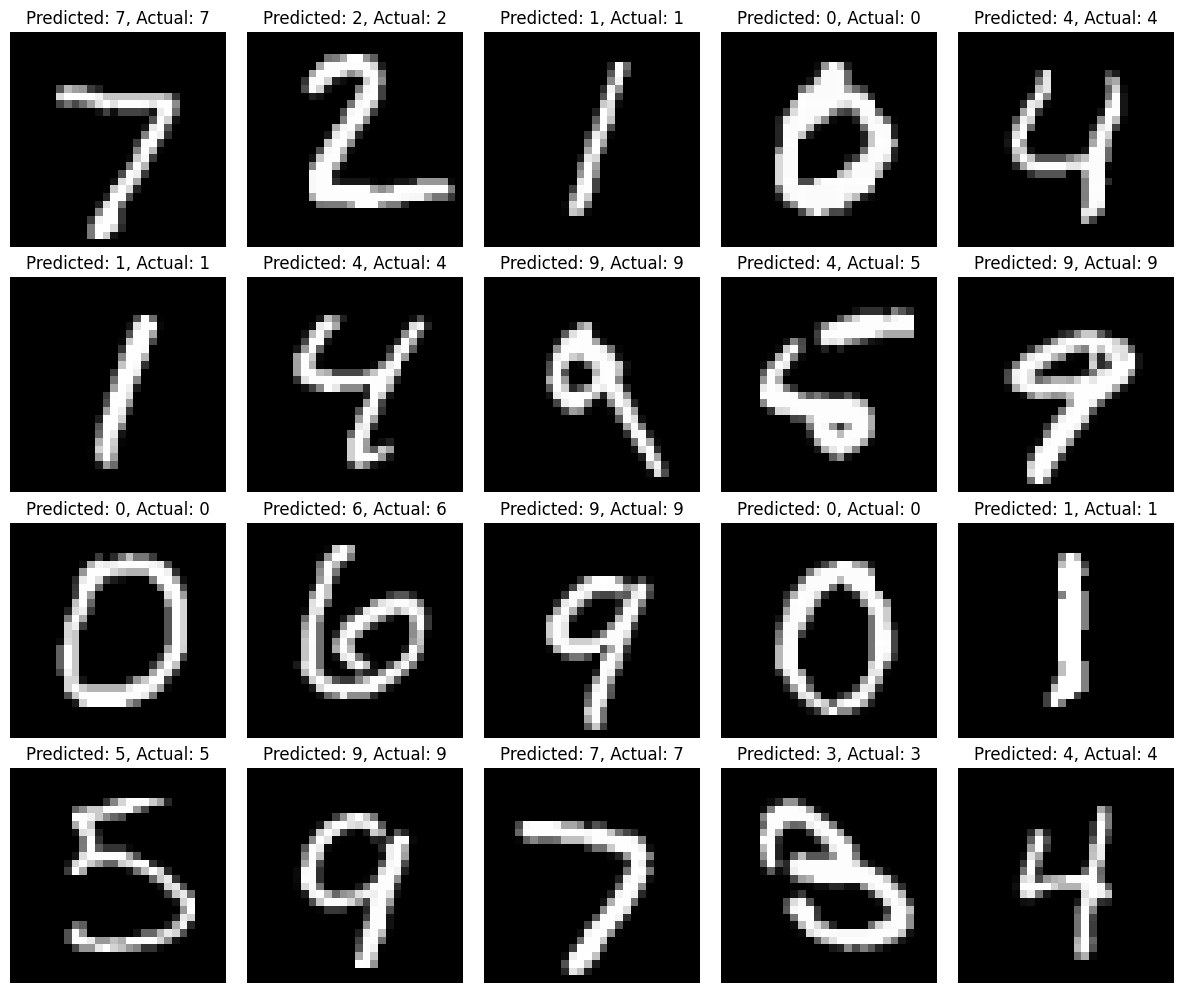

In [46]:
# Load the saved RNN model
loaded_rnn_model = load_rnn_model('mnist_rnn.pth')
# Test the loaded RNN model
evaluate_cnn(loaded_rnn_model, test_loader)
# Visualize predictions using the loaded RNN model
visualize_predictions(loaded_rnn_model, test_loader)

**Note:** The RNN model may not perform as well on MNIST as CNNs or MLPs due to the nature of the data.
However, it demonstrates how to implement an RNN for sequence data.

# Comparision of the three models: -

|Model  | Final Loss | Accuracy(%) | Time taken |  
|-------|------------|-------------|------------|
|MLP    | 0.0939     |  96.99%       | 48.7s|  
|CNN    | 0.0185     |  99.07%       | 2m 6.8s|
|RNN    | 0.1791     |  95.43%       | 1m 21.2s|

**Why ?**

**MLP** - Treats pixels independently, so misses spatial structure, yet still performs decently due to MNIST's simplicity.  
**CNN** - Captures spatial features like edges, patterns; most suited for images. Hence, highest accuracy and lowest loss.
**RNN** - Can extract some sequential patterns row-wise, but loses a lot of spatial info. Better than expected, but not ideal for image tasks.
